In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

### **Simple Linear Regression**

- Models the relationship between one independent variable and a dependent variable.
  - Formula: \( y = mx + b \), where:
    - \( m \): Slope (coefficient)
    - \( b \): Intercept

In [46]:
data_frame_single = pd.read_csv("../datasets/weight-vs-height.csv")
data_frame_single # consider height as the independant var while weight as dependent var

,Weight,Height
0,55,120
1,65,130
2,45,110
3,67,128
4,90,150
5,92,156
6,95,160
7,80,145
8,70,135
9,75,138


Text(0, 0.5, 'Height')

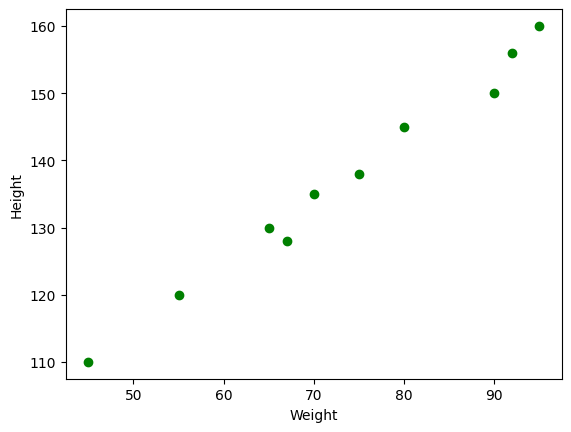

In [47]:
plt.scatter(data_frame_single.Weight, data_frame_single.Height, color = "green")
plt.xlabel(data_frame_single.keys()[0])
plt.ylabel(data_frame_single.keys()[1])

- ***All columns are Series Datatypes.***

In [48]:
print(type(data_frame_single.Weight))
print(type(data_frame_single.Height))

## All columns are Series Datatypes.
## Converting Columns into numpy array to train the model

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


- ***Converting Series Columns into numpy array to train the model***

In [49]:
x_val = np.array(data_frame_single.Weight.values) # independant var
x_val

array([55, 65, 45, 67, 90, 92, 95, 80, 70, 75])

In [50]:
y_val = np.array(data_frame_single.Height.values) # dependant var
y_val

array([120, 130, 110, 128, 150, 156, 160, 145, 135, 138])

- ***Model Training***

In [51]:
model = LinearRegression() # create LinearRegression model

   **model.fit(x, y)** : To train the model for best fit line. ***x values*** must be **2D array**.

In [52]:
x_2D = x_val.reshape(-1, 1)
model.fit(x_2D, y_val)

LinearRegression()

- **Value Prediction Using Trained Model**

In [53]:
x_for_predict = np.array([63]).reshape(-1, 1) # must be 2D array
x_list_for_predict = np.array([63, 58, 86]).reshape(3,-1)

In [54]:
prediction_1 = model.predict(x_for_predict) # return the predict value
prediction_1

array([127.14285714])

In [55]:
prediction_list = model.predict(x_list_for_predict) # return the predict values list
prediction_list

array([127.14285714, 122.30769231, 149.38461538])

- **Find the m, c values of the equation y = mx + c**

**np.polyfit(x_val, y_val, 1)** : Return the m, c of the best fit line y = mx + c respectively

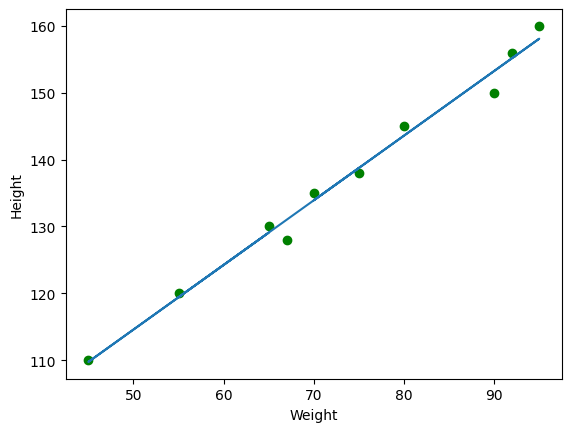

0.9670329670329666 66.21978021978023


In [56]:
plt.scatter(data_frame_single.Weight, data_frame_single.Height, color = "green")

m, c = np.polyfit(x_val, y_val, 1)
plt.plot(x_val, m*x_val + c) # best fit line
plt.xlabel(data_frame_single.keys()[0])
plt.ylabel(data_frame_single.keys()[1])
plt.show()

print(m, c)

- **Find the $R^2$ Score of the model**

In [57]:
from sklearn.metrics import r2_score

In [58]:
y_pred = model.predict(x_2D)
r2 = r2_score(y_val, y_pred)
print(f"R Squared Score: {r2:.2f}")

R Squared Score: 0.99


###
---

### **Multiple Linear Regression**

- Models the relationship between multiple independent variables and a dependent variable.
  - Formula: \( y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n \), where:
    - \( b_0 \): Intercept
    - \( b_1, b_2, ..., b_n \): Coefficients of independent variables.

In [59]:
data_frame_multiple = pd.read_csv("../datasets/cardio_modify.csv")
data_frame_multiple.head()

# SEX = female ? 0: 1 , SMOKE = smorking ? 1: 0 , BPMED = taking ? 1: 0

,SEX,AGEIR,TC,HDL,SMOKE,BPMED,RISK
0,0,48.0,236.0,66,0,1,1.1
1,1,48.0,260.0,51,0,1,7.0
2,1,44.0,187.0,49,1,1,7.0
3,0,42.0,216.0,57,1,1,0.4
4,0,56.0,156.0,42,0,1,2.2


In [60]:
x_values = data_frame_multiple[["SEX", "AGEIR", "SMOKE", "BPMED"]]
y_values = np.array(data_frame_multiple.RISK)

In [61]:
multy_model = LinearRegression()
multy_model.fit(x_values, y_values)

LinearRegression()

In [62]:
prediction_2 = multy_model.predict(X=[[0, 63, 0, 1]])
prediction_2

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.34224251])

- **Find the m values, c  of the equation y = m1x + m2x + .. + c**

In [63]:
coof = multy_model.coef_
coof # item is ordered according to training x values order

array([ 8.34488762,  0.53960853,  3.75392189, -2.17385887])

In [64]:
c = model.intercept_
c

np.float64(66.21978021978022)

- **Find the $R^2$ Score of the model**

In [65]:
y_pred_multy = multy_model.predict(x_values)
r2_multyple = r2_score(y_values, y_pred_multy)
print(f"R Squared Score: {r2_multyple:.2f}")

R Squared Score: 0.54


###
---

### **Linear Regression with Pipeline**

- #### **Polinomial Data without Pipeline**

In [66]:
# Creating data set
X_train = 10 * np.random.normal(1, 1, 70)
y_train = 10 * (X_train**2) + np.random.normal(-100, 100, 70)  # Create polynomial datasets as example.


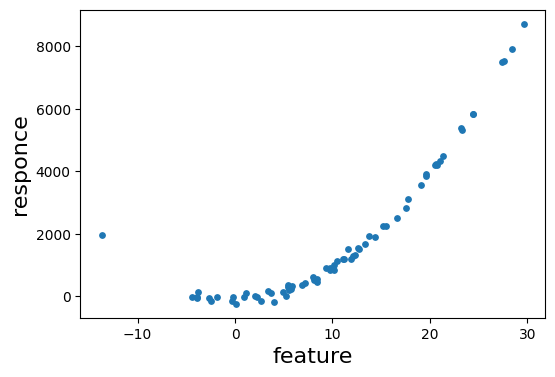

In [67]:
# Plotting Dataset
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, s=15)
plt.xlabel("feature", fontsize=16)
plt.ylabel("responce", fontsize=16)
plt.show()

- **Linear Regression**

In [68]:
from sklearn.linear_model import LinearRegression

In [69]:
# Model training
l_model= LinearRegression()
l_model.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [70]:
pred = l_model.predict(X_train.reshape(-1, 1))

In [71]:
l_model.coef_

array([211.80227523])

In [72]:
l_model.intercept_

np.float64(-350.2031569934891)

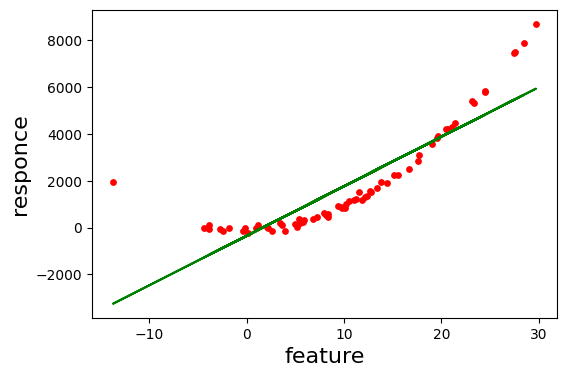

In [73]:
# Plotting
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, s=15, color="red")
plt.xlabel("feature", fontsize=16)
plt.ylabel("responce", fontsize=16)
plt.plot(X_train, pred, color="g")
plt.show()

- **Evaluate**

In [74]:
from sklearn.metrics import r2_score

In [75]:
r2 = r2_score(y_train, pred)
r2

0.7722101341537532

- #### **With Pipeline**

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [77]:
# create pipeline and fit it in data

pipeline = Pipeline([
    ("transformer", PolynomialFeatures(degree=2)),
    ("estimator", LinearRegression())
])

pipeline.fit(X_train.reshape(-1, 1), y_train)

Pipeline(steps=[('transformer', PolynomialFeatures()),
                ('estimator', LinearRegression())])

In [78]:
# Get pipeline prediction
pipe_pred = pipeline.predict(X_train.reshape(-1, 1))

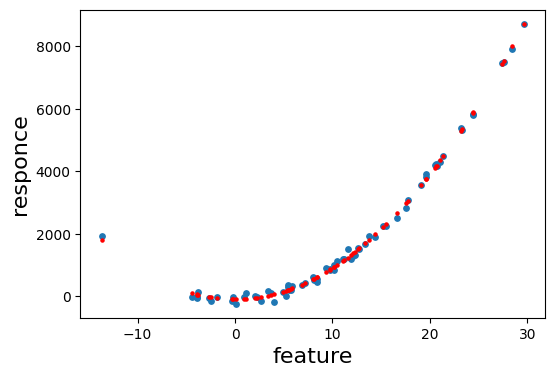

In [82]:
# Plotting Prediction
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, s=15)
plt.xlabel("feature", fontsize=16)
plt.ylabel("responce", fontsize=16)
plt.scatter(X_train, pipe_pred, color="r", s=5)
plt.show()

In [80]:
pipe_r2 = r2_score(y_train, pipe_pred)
pipe_r2

0.9980998915906831

###
---